In [1]:
# Uncomment and run to reload libs
# import importlib
# import utils
# importlib.reload(utils)
# import utils.miscellaneous
# importlib.reload(utils.miscellaneous)


import pandas as pd
import matplotlib.pyplot as plt

from utils import (
    logging,
    RECOMMENDED_MUTATIONS_FILE,
    FUTURE_COMBO_FILE,
)


In [2]:
pred_scores = pd.read_csv(RECOMMENDED_MUTATIONS_FILE)
dated_combo = pd.read_csv(FUTURE_COMBO_FILE)
dated_combo["Date"] = pd.to_datetime(dated_combo["Date"])


In [19]:
dated_combo_scores = pd.merge(dated_combo, pred_scores, on=["Accession", "Mut"], how="inner")


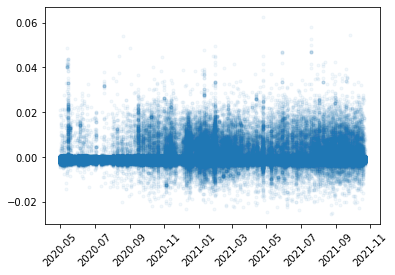

In [20]:
plt.plot_date(dated_combo_scores["Date"], dated_combo_scores["value"], fmt=".", alpha=0.05)
plt.xticks(rotation=45)
plt.show()
plt.close()


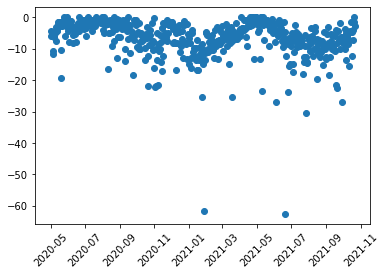

In [45]:
dated_combo_scores_mean = dated_combo_scores.groupby("Date", sort=False).sum()
plt.plot_date(dated_combo_scores_mean.index, dated_combo_scores_mean["value"])
plt.xticks(rotation=45)
plt.show()
plt.close()


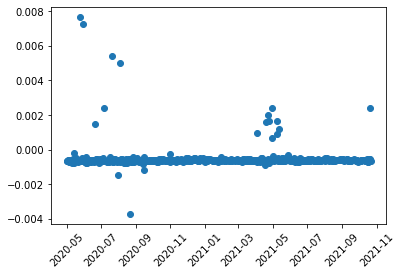

In [46]:
dated_combo_scores_mean = dated_combo_scores.groupby("Date", sort=False).mean()
plt.plot_date(dated_combo_scores_mean.index, dated_combo_scores_mean["value"])
plt.xticks(rotation=45)
plt.show()
plt.close()


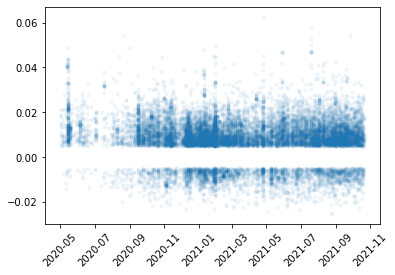

In [51]:
x = dated_combo_scores[(dated_combo_scores["value"] > 0.005) | (dated_combo_scores["value"] < -0.005)]
plt.plot_date(x["Date"], x["value"], fmt=".", alpha=0.05)
plt.xticks(rotation=45)
plt.show()
plt.close()


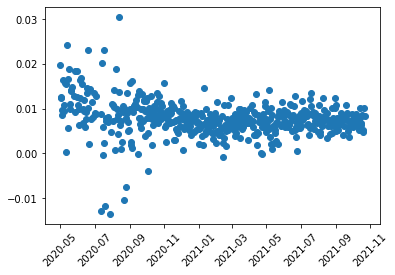

In [52]:
x_mean = x.groupby("Date", sort=False).mean()
plt.plot_date(x_mean.index, x_mean["value"])
plt.xticks(rotation=45)
plt.show()
plt.close()